In [1]:
import pygatt
import numpy as np
import struct

import matplotlib.pyplot as plt
%matplotlib notebook

# define PC bluetooth adapter
adapter = pygatt.GATTToolBackend()

In [2]:
adapter.start()
myBLE_Nordic = 'cf:81:e3:0b:ee:e2'

techB_device = adapter.connect(myBLE_Nordic,
                               timeout=5,
                              address_type = pygatt.backends.BLEAddressType.random)

In [3]:
techB_device.char_write_handle(0x03,b'techB-1')
for data in range(1,0x18):
    value = techB_device.char_read_handle(hex(data))
    print("{} {}".format(hex(data), value))

0x1 bytearray(b'\x00\x18')
0x2 bytearray(b'\n\x03\x00\x00*')
0x3 bytearray(b'techB-1')
0x4 bytearray(b'\x02\x05\x00\x01*')
0x5 bytearray(b'\x00\x00')
0x6 bytearray(b'\x02\x07\x00\x04*')
0x7 bytearray(b'\x10\x00<\x00\x00\x00\x90\x01')
0x8 bytearray(b'\x01\x18')
0x9 bytearray(b'\x9e\xca\xdc$\x0e\xe5\xa9\xe0\x93\xf3\xa3\xb5\x01\x00@n')
0xa bytearray(b'\x10\x0b\x00\x9e\xca\xdc$\x0e\xe5\xa9\xe0\x93\xf3\xa3\xb5\x02\x00@n')
0xb bytearray(b'A')
0xc bytearray(b'\x00\x00')
0xd bytearray(b'\x10\x0e\x00\x9e\xca\xdc$\x0e\xe5\xa9\xe0\x93\xf3\xa3\xb5\x03\x00@n')
0xe bytearray(b'\xdf')
0xf bytearray(b'\x00\x00')
0x10 bytearray(b'\x10\x11\x00\x9e\xca\xdc$\x0e\xe5\xa9\xe0\x93\xf3\xa3\xb5\x04\x00@n')
0x11 bytearray(b'\xff')
0x12 bytearray(b'\x00\x00')
0x13 bytearray(b'\x10\x14\x00\x9e\xca\xdc$\x0e\xe5\xa9\xe0\x93\xf3\xa3\xb5\x05\x00@n')
0x14 bytearray(b'\x7f')
0x15 bytearray(b'\x00\x00')
0x16 bytearray(b'\x10\x17\x00\x9e\xca\xdc$\x0e\xe5\xa9\xe0\x93\xf3\xa3\xb5\x06\x00@n')
0x17 bytearray(b'\x00')


In [4]:
techB_device.char_write_handle(0x0F, bytearray([1,0]))
techB_device.char_read_handle('0x0F')

bytearray(b'\x01\x00')

In [ ]:
while True:
    value = techB_device.char_read_handle('0x0e')
    print("{}".format(struct.unpack('6B',value)))

<IPython.core.display.Javascript object>


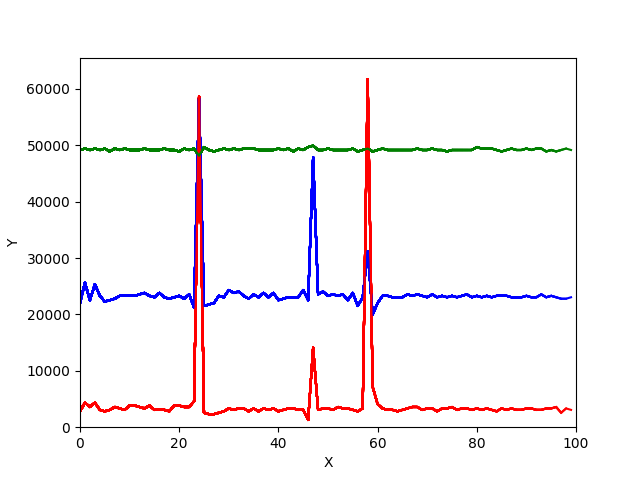

In [5]:
"Dynamic plotting in matplotlib. Copy and paste into a Jupyter notebook."
# written October 2016 by Sam Greydanus
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(t, x, y, z, ax):
    ax.plot(t, x, color = 'b')
    ax.plot(t, y, color = 'r')
    ax.plot(t, z, color = 'g')
        
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X') ; ax.set_ylabel('Y')
ax.set_xlim(0,100) ; ax.set_ylim(0,2**16)
ts, xs, ys, zs = [], [], [], []

# this is any loop for which you want to plot dynamic updates.
# in my case, I'm plotting loss functions for neural nets
for t in range(100):
    value = struct.unpack('6B',techB_device.char_read_handle('0x0e'))
    xValue = (value[1] << 8) + value[0] 
    yValue = (value[3] << 8) + value[2] 
    zValue = (value[5] << 8) + value[4] 
    ts.append(t)
    xs.append(xValue)
    ys.append(yValue)
    zs.append(zValue)
#     if x % 5 == 0:
    plt_dynamic(ts, xs, ys, zs, ax)